In [5]:
# this notebook will fit an n-th degree plonomial surface to steering data
# import modules
import numpy as np
from numpy.polynomial.polynomial import polyval2d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import lmfit as lm

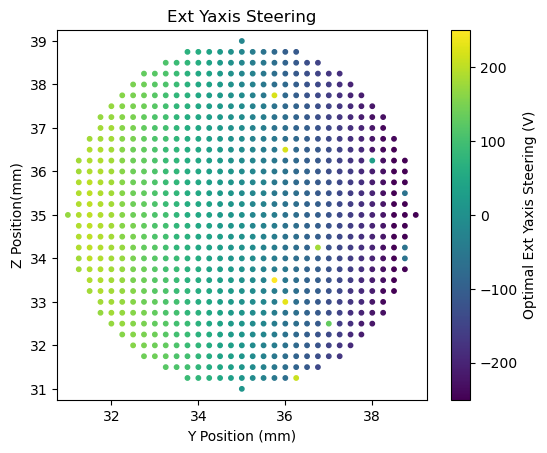

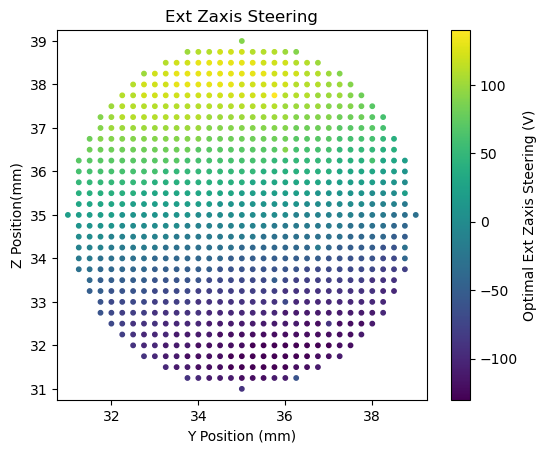

In [6]:
# import data from processed file
data = np.genfromtxt("ExtractionSteering2DScan_data.csv", delimiter=",")
ypos = data[1:, 0]
zpos = data[1:, 1]
vsteerax1 = data[1:, 3]
vsteerax2 = data[1:, 4]
p_step = ypos[1] - ypos[0]

# plot the data in 2d
plt.figure('Best Ext Yaxis Steering')
plt.scatter(ypos,zpos,c=vsteerax1, s=10)
plt.xlabel('Y Position (mm)')
plt.ylabel('Z Position(mm)')
plt.xlim(min(ypos)-p_step, max(ypos)+p_step)
plt.ylim(min(zpos)-p_step, max(zpos)+p_step)
plt.colorbar(label="Optimal Ext Yaxis Steering (V)")
plt.title('Ext Yaxis Steering')
plt.gca().set_aspect('equal')

plt.figure('Best Ext Zaxis Steering')
plt.scatter(ypos,zpos,c=vsteerax2, s=10)
plt.xlabel('Y Position (mm)')
plt.ylabel('Z Position(mm)')
plt.xlim(min(ypos)-p_step, max(ypos)+p_step)
plt.ylim(min(zpos)-p_step, max(zpos)+p_step)
plt.colorbar(label="Optimal Ext Zaxis Steering (V)")
plt.title('Ext Zaxis Steering')
plt.gca().set_aspect('equal')

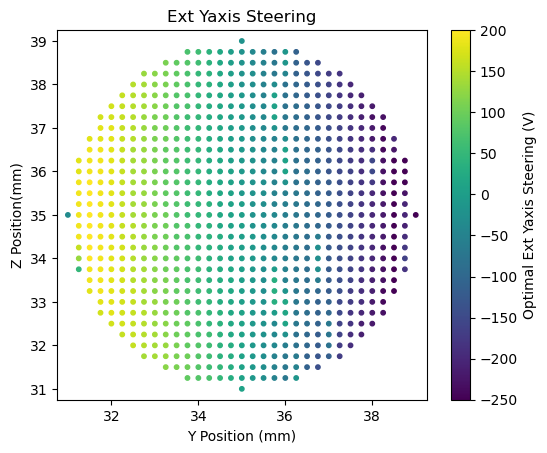

In [32]:
# several unphysical outliers in y-axis steering, smooth them out
for v in range(1,len(vsteerax1)-1):
    if np.abs(vsteerax1[v] - np.mean([vsteerax1[v-1],vsteerax1[v+1]])) >= 20:
        vsteerax1[v] = np.mean([vsteerax1[v-1],vsteerax1[v+1]])

# plot the data in 2d
plt.figure('Best Ext Yaxis Steering')
plt.scatter(ypos,zpos,c=vsteerax1, s=10)
plt.xlabel('Y Position (mm)')
plt.ylabel('Z Position(mm)')
plt.xlim(min(ypos)-p_step, max(ypos)+p_step)
plt.ylim(min(zpos)-p_step, max(zpos)+p_step)
plt.colorbar(label="Optimal Ext Yaxis Steering (V)")
plt.title('Ext Yaxis Steering')
plt.gca().set_aspect('equal')
plt.savefig('OptimalYaxisSteeringSweep_Smoothed.png')

In [33]:
# use numpy to make polynomial surface

# generate all names for coefficients
order = 3 
dy, dz = (order,order)
coeff_names = []
for i in range(dy+1):
    for j in range(dz+1):
        coeff_names.append('c'+str(i)+str(j))
        exec('c'+str(i)+str(j)+' = i*10+j')

coeff_names2d = np.reshape(coeff_names,(dy+1,dz+1))
#print(coeff_names)

exec('def polysurf(y, z, '+', '.join(coeff_names)+'):\n\tc = np.empty((dy+1,dz+1))\n\tfor i in range(np.shape(c)[0]):\n\t\tfor j in range(np.shape(c)[1]):\n\t\t\texec("c[i,j] = "+coeff_names2d[i,j])\n\treturn polyval2d(y, z, c)')

In [34]:
model = lm.Model(polysurf, independent_vars=['y','z'], nan_policy= 'omit')
params = model.make_params()
for p in model.param_names:
    params[p].value = 1
#params.pretty_print(columns=['value'])

In [35]:
ax1steer_result = model.fit(vsteerx, y=ypos, z=zpos, params=params)
ax1steer_file = open('Ext_Yaxis_Steering_EquationParameters.csv', 'w', encoding="utf-8")
ax1steer_file.write(ax1steer_result.fit_report(show_correl=False))
ax1steer_file.write('\n[[Model Equation]]\n\u03A3_i\u03A3_j c_i,j * ypos^i * zpos^j')
ax1steer_file.close()
print(ax1steer_result.params.pretty_print(columns=['value', 'stderr']))

Name     Value   Stderr
c00  6.997e+06      nan
c01  -4.489e+05      nan
c02      8505      nan
c03    -39.73      nan
c10  -6.285e+05      nan
c11  4.069e+04      nan
c12    -785.2      nan
c13     3.876      nan
c20  1.87e+04      nan
c21     -1219      nan
c22     23.82      nan
c23   -0.1219      nan
c30    -184.5      nan
c31     12.07      nan
c32   -0.2379      nan
c33  0.001245      nan
None


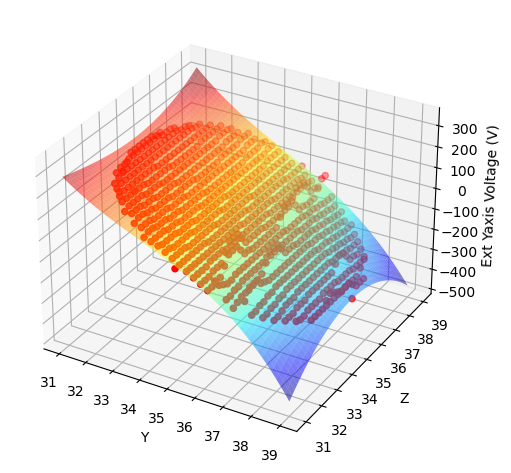

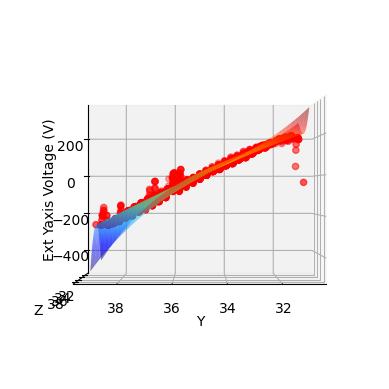

In [36]:
# Generate meshgrid for plotting
num_points = 1000
y_range = np.linspace(min(ypos), max(ypos), num_points)
z_range = np.linspace(min(zpos), max(zpos), num_points)
Y, Z = np.meshgrid(y_range, z_range)
Vax1 = ax1steer_result.eval(params=ax1steer_result.params, y=Y, z=Z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ypos, zpos, vsteerax1, c='red', label='Data')
ax.plot_surface(Y, Z, Vax1, cmap='jet', alpha=0.5, label='Fitted Surface')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('Ext Yaxis Voltage (V)')
plt.tight_layout()
plt.savefig('Ext_Yaxis_Steering_Fit_Plot.png')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ypos, zpos, vsteerax1, c='red', label='Data')
ax.plot_surface(Y, Z, Vax1, cmap='jet', alpha=0.5, label='Fitted Surface')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('Ext Yaxis Voltage (V)')
ax.view_init(0,90)

Mean Residual: 10.011992449661994
Max Residual: 287.2019460756926
Std Residual: 29.197505961019715


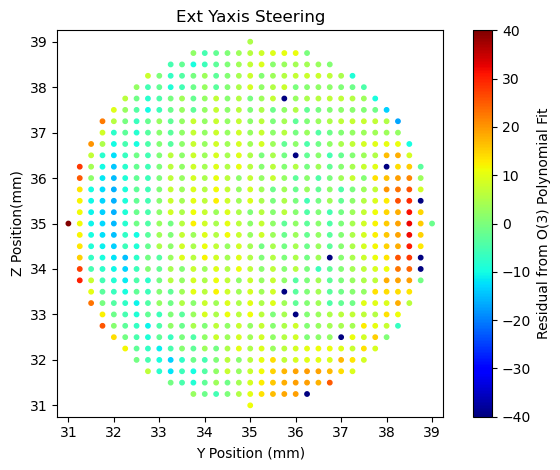

In [37]:
# plot the residuals in 2d
plt.figure('Best Ext Yaxis Steering')
plt.scatter(ypos,zpos,c=ax1steer_result.residual, s=10, cmap='jet')
plt.xlabel('Y Position (mm)')
plt.ylabel('Z Position(mm)')
plt.xlim(min(ypos)-p_step, max(ypos)+p_step)
plt.ylim(min(zpos)-p_step, max(zpos)+p_step)
plt.colorbar(label="Residual from O("+str(order)+") Polynomial Fit")
plt.title('Ext Yaxis Steering')
plt.gca().set_aspect('equal')
plt.clim(-40,40)
plt.tight_layout()
plt.savefig('Ext_Yaxis_Steering_Fit_Plot_Residual.png')
print('Mean Residual:',np.mean(np.abs(ax1steer_result.residual)))
print('Max Residual:',np.amax(np.abs(ax1steer_result.residual)))
print('Std Residual:',np.std(np.abs(ax1steer_result.residual)))

In [13]:
ax2steer_result = model.fit(vsteerax2, y=ypos, z=zpos, params=params)
ax2steer_file = open('Ext_Zaxis_Steering_EquationParameters.csv', 'w', encoding="utf-8")
ax2steer_file.write(ax2steer_result.fit_report(show_correl=False))
ax2steer_file.write('\n[[Model Equation]]\n\u03A3_i\u03A3_j c_i,j * ypos^i * zpos^j')
ax2steer_file.close()
print(ax2steer_result.params.pretty_print(columns=['value', 'stderr']))

Name     Value   Stderr
c00   1.4e+06 7.068e+05
c01  -9.887e+04 5.222e+04
c02      2282     1390
c03    -17.06    13.85
c10  -9.104e+04 5.33e+04
c11      5999     3696
c12    -124.5    93.68
c13    0.7767   0.9476
c20      1919     1416
c21    -113.5    92.84
c22     1.899    2.219
c23  -0.006188  0.02267
c30    -11.74    13.64
c31    0.5274   0.8913
c32  -0.002279  0.02101
c33  -9.333e-05 0.0002114
None


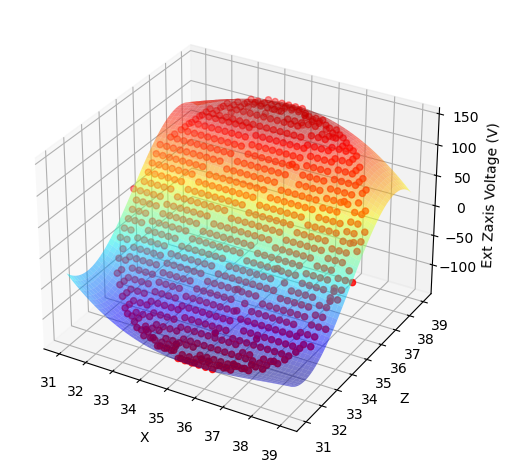

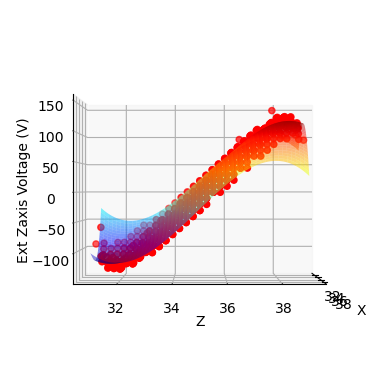

In [17]:
# Generate meshgrid for plotting
num_points = 1000
y_range = np.linspace(min(ypos), max(ypos), num_points)
z_range = np.linspace(min(zpos), max(zpos), num_points)
Y, Z = np.meshgrid(y_range, z_range)
Vax2 = ax2steer_result.eval(params=ax2steer_result.params, y=Y, z=Z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ypos, zpos, vsteerax2, c='red', label='Data')
ax.plot_surface(Y, Z, Vax2, cmap='jet', alpha=0.5, label='Fitted Surface')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Ext Zaxis Voltage (V)')
plt.tight_layout()
plt.savefig('Ext_Zaxis_Steering_Fit_Plot.png')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ypos, zpos, vsteerax2, c='red', label='Data')
ax.plot_surface(Y, Z, Vax2, cmap='jet', alpha=0.5, label='Fitted Surface')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Ext Zaxis Voltage (V)')
ax.view_init(0,0)

Mean Residual: 4.012224493449131
Max Residual: 60.19880459732667
Std Residual: 4.452746585143338


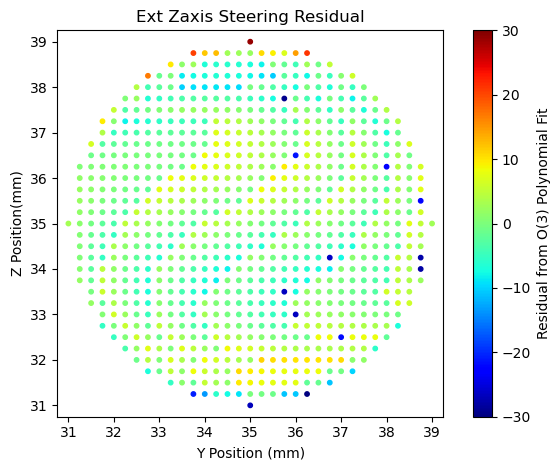

In [22]:
# plot the residuals in 2d
plt.figure('Best Ext Zaxis Steering')
plt.scatter(ypos,zpos,c=ax2steer_result.residual, s=10, cmap='jet')
plt.xlabel('Y Position (mm)')
plt.ylabel('Z Position(mm)')
plt.xlim(min(ypos)-p_step, max(ypos)+p_step)
plt.ylim(min(zpos)-p_step, max(zpos)+p_step)
plt.colorbar(label="Residual from O("+str(order)+") Polynomial Fit")
plt.title('Ext Zaxis Steering Residual')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.clim(-30,30)
plt.savefig('Ext_Zaxis_Steering_Fit_Plot_Residual.png')
print('Mean Residual:',np.mean(np.abs(ax2steer_result.residual)))
print('Max Residual:',np.amax(np.abs(ax2steer_result.residual)))
print('Std Residual:',np.std(np.abs(ax2steer_result.residual)))